<a href="https://colab.research.google.com/github/mingmingeddiewu/Mycode/blob/python-practice/Data_Analytics_202406.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Data Analytics Task
### The health records are imported from the Forida State University. I try to get some insights after manipulating the data.


In [2]:
# when using python to conduct some analyzing tasks, I usually import below libraries. I hope it also makes sense to you.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Under pandas library, applying 'read_csv' module to import the data from external sources.
# Here is an absolute link because the data is located on a website. If the data is on your drive, use relative link.
body_records = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/hw_25000.csv', sep=',')
print(body_records.head(10))

   Index   "Height(Inches)"   "Weight(Pounds)"
0      1           65.78331           112.9925
1      2           71.51521           136.4873
2      3           69.39874           153.0269
3      4           68.21660           142.3354
4      5           67.78781           144.2971
5      6           68.69784           123.3024
6      7           69.80204           141.4947
7      8           70.01472           136.4623
8      9           67.90265           112.3723
9     10           66.78236           120.6672


In [4]:
new_body_records = pd.DataFrame({
    'Height_inches': body_records.iloc[:, 1],
    'Weight_pounds': body_records.iloc[:, 2]
})
print(new_body_records.iloc[100:110, :])

     Height_inches  Weight_pounds
100       64.87434      102.09270
101       67.09272      130.35300
102       68.34761      134.18420
103       65.61073       98.64133
104       67.75551      114.55990
105       68.02120      123.49170
106       67.66193      123.04800
107       66.31460      126.47720
108       69.43706      128.41700
109       63.83624      127.19410


In [5]:
print(new_body_records.tail(10))

       Height_inches  Weight_pounds
24990       69.97767       125.3672
24991       71.91656       128.2840
24992       70.96218       146.1936
24993       66.19462       118.7974
24994       67.21126       127.6603
24995       69.50215       118.0312
24996       64.54826       120.1932
24997       64.69855       118.2655
24998       67.52918       132.2682
24999       68.87761       124.8742


In [7]:
# Before processing data, it is always a good practice to have a view of the data.
# To check if any null field
# Also, to check the data type (Be aware of the number fields, sometimes they are number, but actually the data type is object. We can't perform any calcuation if the field is object. We have to convert them into integer or float.)
new_body_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height_inches  25000 non-null  float64
 1   Weight_pounds  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [8]:
new_body_records['Height_cm'] = round(new_body_records['Height_inches']*2.54, 2)

In [9]:
new_body_records['Weight_kg'] = round(new_body_records['Weight_pounds']/2.2, 2)

In [10]:
print(new_body_records.iloc[2000:2010, :])

      Height_inches  Weight_pounds  Height_cm  Weight_kg
2000       69.00812      125.47630     175.28      57.03
2001       68.69462      130.13420     174.48      59.15
2002       68.53874      123.27150     174.09      56.03
2003       67.68634      129.98060     171.92      59.08
2004       69.60608      138.67340     176.80      63.03
2005       68.91393      130.70560     175.04      59.41
2006       66.17148      113.37070     168.08      51.53
2007       67.46209      139.68330     171.35      63.49
2008       72.83513      148.80020     185.00      67.64
2009       64.01976       90.91793     162.61      41.33


<Axes: >

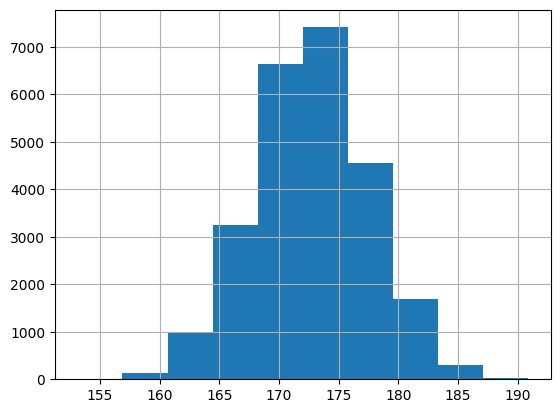

In [12]:
# plot the height data into a histogram and see if it is normal distribution
# It's vital to have a normal distribution since many statistics methods are based on the normal distribution
# If data is not in normal distribution, we can normalize them by using some techniques of normalization
new_body_records['Height_cm'].hist()

In [21]:
# To decide if the data is in a normal distribution, we first calculate the mean and standard deviation
# mean() and std() are from the numpy
mean_height_cm = new_body_records['Height_cm'].mean()
std_height_cm = new_body_records['Height_cm'].std()
print('Mean of the height(cm):', mean_height_cm)
print('Standard deviation of the height(cm):', std_height_cm)
# Normal distribution has fixed rules:
# mean + 1*std / - 1*std include 68% data
# mean + 2*std / - 2*std include 95% data
# mean + 3*std / - 3*std include 95% data
# below steps can figure out the inner part between 3*std and -3*std
upper_height_cm = mean_height_cm + (3 * std_height_cm)
lower_height_cm = mean_height_cm - (3 * std_height_cm)
print('mean + 3*std:',upper_height_cm)
print('mean - 3*std ',lower_height_cm)
inner_part = ((new_body_records['Height_cm'] >= lower_height_cm) & (new_body_records['Height_cm'] <= upper_height_cm)).mean()
print('The data proportion below mean + 3*std and mean - 3*std:',inner_part)
# the inner part is 0.99796 or 99.796%
# we can confirm that the data is in a normal distribution

Mean of the height(cm): 172.70251880000004
Standard deviation of the height(cm): 4.830287559841856
mean + 3*std: 187.1933814795256
mean - 3*std  158.21165612047446
The data proportion below mean + 3*std and mean - 3*std: 0.99796


In [23]:
# from 'scipy' library, we can import 'stats' module to get some statistics methods
from scipy import stats

In [27]:
# Why culcalate the zscore?
# Because we want to see if any outliers
new_body_records['zscore_height'] = stats.zscore(new_body_records['Height_cm'])
print(new_body_records.iloc[3000:3010])
# from -3 to 3 is the normal range of zscore, and if zscore > 3 and < -3 is considered a outlier
outlier_height = new_body_records.loc[(new_body_records['zscore_height'] > 3) | (new_body_records['zscore_height'] < -3), ['zscore_height']]
print('The amount of outliers:',outlier_height.count())

      Height_inches  Weight_pounds  Height_cm  Weight_kg  zscore_height
3000       70.51338       143.7382     179.10      65.34       1.324478
3001       70.63103       145.4599     179.40      66.12       1.386587
3002       69.83323       133.1488     177.38      60.52       0.968384
3003       69.76098       132.4917     177.19      60.22       0.929048
3004       68.11679       126.8125     173.02      57.64       0.065728
3005       66.53431       120.2043     169.00      54.64      -0.766537
3006       71.03730       127.1770     180.43      57.81       1.599829
3007       65.66484       119.1195     166.79      54.15      -1.224076
3008       67.11404       131.0110     170.47      59.55      -0.462201
3009       70.93121       151.9596     180.17      69.07       1.546001
The amount of outliers: zscore_height    51
dtype: int64


In [28]:
new_body_records.drop('zscore_height', axis=1, inplace=True)

In [29]:
new_body_records.iloc[4100:4110, :]

,Height_inches,Weight_pounds,Height_cm,Weight_kg
4100,69.37333,129.9046,176.21,59.05
4101,67.32750,127.3943,171.01,57.91
4102,63.91658,113.9444,162.35,51.79
4103,67.23806,103.9784,170.78,47.26
4104,65.93291,117.1245,167.47,53.24
4105,70.35586,135.3823,178.70,61.54
4106,68.57141,131.0931,174.17,59.59
4107,66.82713,130.6498,169.74,59.39
4108,64.43271,119.4229,163.66,54.28
4109,71.08973,127.4216,180.57,57.92


In [30]:
# height and weight provide nothing meaningful, however, we can use them to calculate 'BMI(Body Mass Index)' to unveil the body quality of each individual
new_body_records['BMI'] = new_body_records['Weight_kg'] / (new_body_records['Height_cm']/100)**2
print(new_body_records.head(10))

   Height_inches  Weight_pounds  Height_cm  Weight_kg        BMI
0       65.78331       112.9925     167.09      51.36  18.396029
1       71.51521       136.4873     181.65      62.04  18.801867
2       69.39874       153.0269     176.27      69.56  22.387354
3       68.21660       142.3354     173.27      64.70  21.550509
4       67.78781       144.2971     172.18      65.59  22.124437
5       68.69784       123.3024     174.49      56.05  18.409184
6       69.80204       141.4947     177.30      64.32  20.461081
7       70.01472       136.4623     177.84      62.03  19.612948
8       67.90265       112.3723     172.47      51.08  17.172114
9       66.78236       120.6672     169.63      54.85  19.062125


In [31]:
# Different BMIs represent the body quality, use 'lambda x' to label them and add a column named 'BMI_status'
new_body_records['BMI_status'] = new_body_records['BMI'].apply(lambda x: 'underweight' if x < 18.5
                                                               else 'healthy_range' if x > 18.5 and x <= 25
                                                               else 'overweight' if x >25 and x <= 30
                                                               else 'obesity' if x >30 and x <= 40
                                                               else 'severe_obesity')

In [32]:
new_body_records.loc[5600:5610, :]

,Height_inches,Weight_pounds,Height_cm,Weight_kg,BMI,BMI_status
5600,65.37072,125.7601,166.04,57.16,20.733221,healthy_range
5601,72.07311,142.2552,183.07,64.66,19.293070,healthy_range
5602,67.65702,120.8003,171.85,54.91,18.593124,healthy_range
5603,71.13971,149.4626,180.69,67.94,20.809292,healthy_range
5604,69.56951,138.5706,176.71,62.99,20.172018,healthy_range
5605,68.47465,116.2406,173.93,52.84,17.466819,underweight
5606,68.65104,135.3612,174.37,61.53,20.236872,healthy_range
5607,69.29567,146.4768,176.01,66.58,21.491618,healthy_range
5608,65.94966,131.8327,167.51,59.92,21.354545,healthy_range
5609,67.88775,137.3897,172.43,62.45,21.004231,healthy_range


In [34]:
# Based on the 'BMI_status' column, we find that 7205 are underweight
# On the contrary, only 6 are overweight
new_body_records['BMI_status'].value_counts()

BMI_status
healthy_range    17789
underweight       7205
overweight           6
Name: count, dtype: int64

In [35]:
# the precentage of underweight against the total
underweight_proportion = (new_body_records.loc[(new_body_records['BMI_status'] == 'underweight')]).count() / new_body_records.count()
print(underweight_proportion['BMI_status'])

0.2882


In [37]:
# we figure out that even the overweight's BMIs do not exceed too much
# only 0.11 to 1.08 above
new_body_records.loc[(new_body_records['BMI_status'] == 'overweight')]

,Height_inches,Weight_pounds,Height_cm,Weight_kg,BMI,BMI_status
3683,64.51584,148.5007,163.87,67.50,25.136503,overweight
8008,65.43614,152.6168,166.21,69.37,25.110618,overweight
10905,64.58076,150.6921,164.04,68.50,25.456052,overweight
16126,67.56548,164.5865,171.62,74.81,25.399424,overweight
21388,65.31992,157.9292,165.91,71.79,26.080675,overweight
23436,65.01842,151.4337,165.15,68.83,25.236006,overweight


In [39]:
new_body_records.groupby(by='BMI_status').agg({'Height_cm': ['mean', 'max', 'min'],
                                               'Weight_kg': ['mean', 'max', 'min'],
                                               'BMI': ['mean', 'max', 'min']})

Height_cm                  Weight_kg                      BMI  \
                     mean     max     min       mean    max    min       mean   
BMI_status                                                                      
healthy_range  172.501889  190.79  153.11  59.835001  77.69  45.37  20.101946   
overweight     166.133333  171.62  163.87  70.133333  74.81  67.50  25.403213   
underweight    173.203341  190.89  153.96  52.638179  66.80  35.46  17.530400   

                                     
                     max        min  
BMI_status                           
healthy_range  24.688848  18.500136  
overweight     26.080675  25.110618  
underweight    18.499949  13.099881

### Insights, so far
1.   1 in 4 is underweight
2.   The underweight share a similar height mean with the healthy range group, 173.2 and 172.5 respectively. However, the underweight weight mean is almost 10kg lower than the healthy range group.
1.   We could consider further investigating if the underweight would be an issue. Using historical data can help us to understand if the underweight is a one-time issue or an ongoing trend.

2.   The BMIs of overweight group do not exceed too much, only 0.11 to 1.08. Overweight is not an issue.





#### Performing some sampling techniques below. In case, we can't get the data of target population, we still can take samples and consider if the sample statistics are reliable.

In [40]:
# taking a single sample pack from the whole group
body_sample_data = new_body_records.sample(n=50, replace=True, random_state=23456)
print(body_sample_data['Height_cm'].mean())

172.90279999999998


In [41]:
# comparing the population mean with the sample mean, they are very similar, 172.7 and 172.9 respectively
print(mean_height_cm)

172.70251880000004


In [43]:
# taking 10000 samples data from the population and calculate their mean of height
sample_data_list = []
for i in range(10000):
  sample_data_list.append(new_body_records['Height_cm'].sample(n=50, replace=True).mean())
sample_data_df = pd.DataFrame(data={'Estimate': sample_data_list})
print(sample_data_df['Estimate'].mean())
# we find that the mean of 10000 sample height means is very similar to the population mean.
# Therefore, more samples we can take, more accurate the data is.

172.6998845


In [44]:
# calculate the Confidence Interval of one sample group
body_sample_data_mean = body_sample_data['Height_cm'].mean()
estimated_standard_error = body_sample_data['Height_cm'].std() / np.sqrt(body_sample_data.shape[0])
print(body_sample_data_mean)
print(estimated_standard_error)

172.90279999999998
0.7261796618086254


In [45]:
# if the Confidence Interval is 95%
stats.norm.interval(confidence=0.95, loc=body_sample_data_mean, scale=estimated_standard_error)

(171.47951401654962, 174.32608598345035)

In [46]:
# if the Confidence Interval is 99%
stats.norm.interval(confidence=0.99, loc=body_sample_data_mean, scale=estimated_standard_error)

(171.0322851474721, 174.77331485252788)